In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [2]:
data = pd.read_csv('penguins_size.csv')

# Univariate Analysis

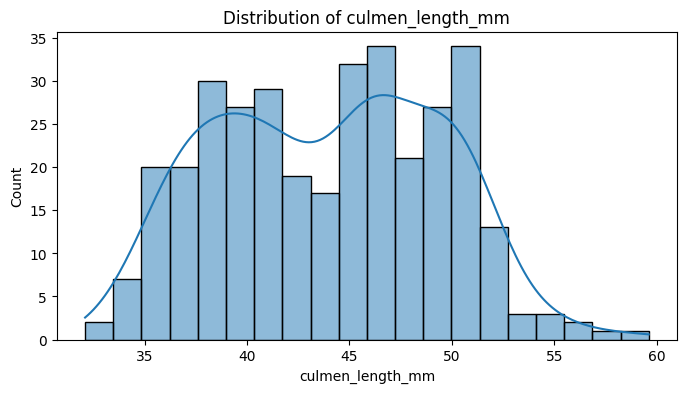

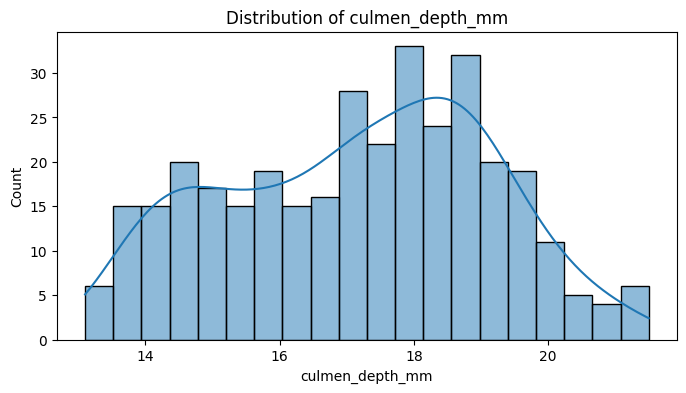

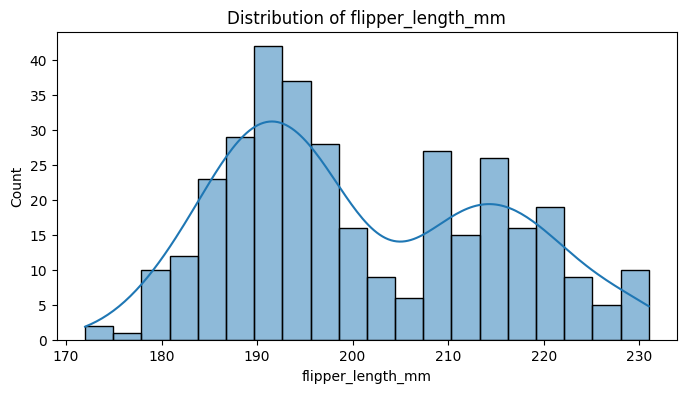

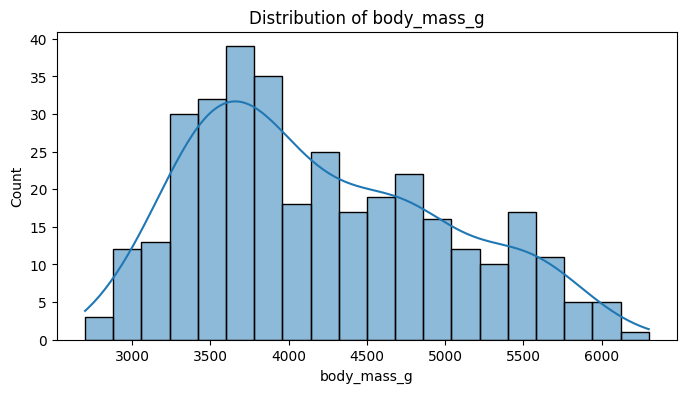

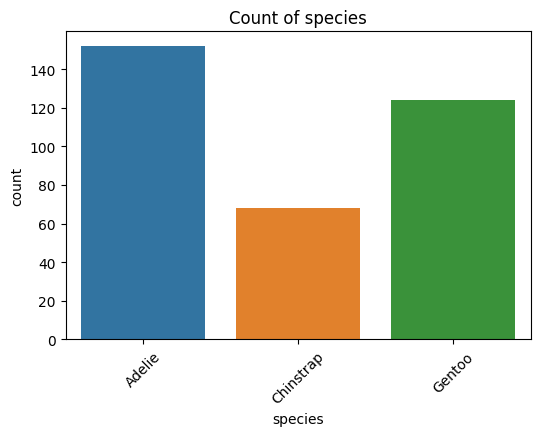

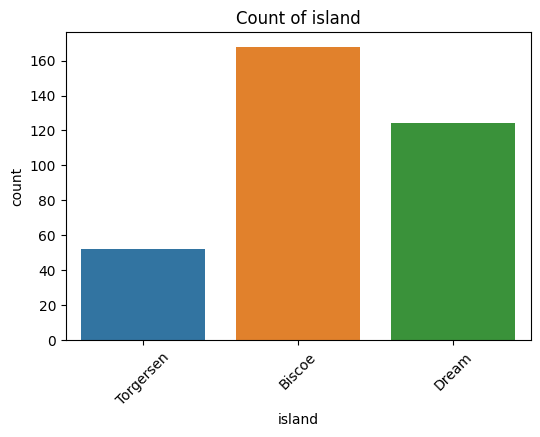

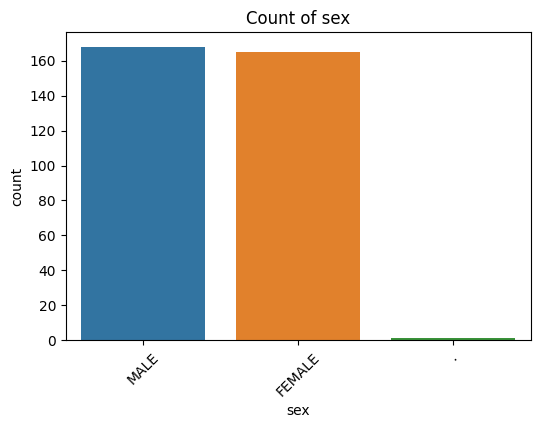

In [3]:
def univariate_analysis(data):
    # Numerical features
    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=data, x=feature, bins=20, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()
    categorical_features = ['species', 'island', 'sex']
    
    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=data, x=feature)
        plt.title(f'Count of {feature}')
        plt.xticks(rotation=45)
        plt.show()

univariate_analysis(data)

# Bivariate Analysis

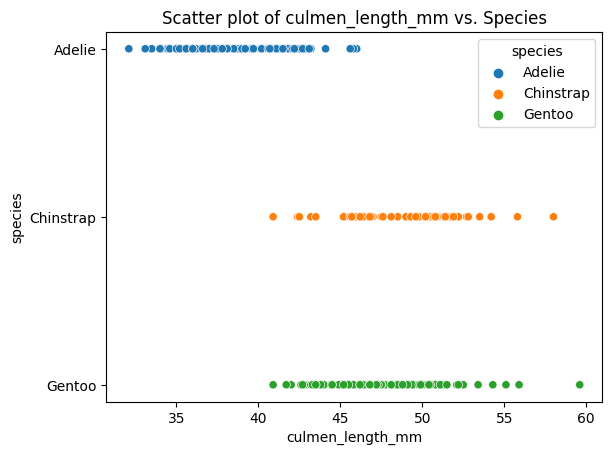

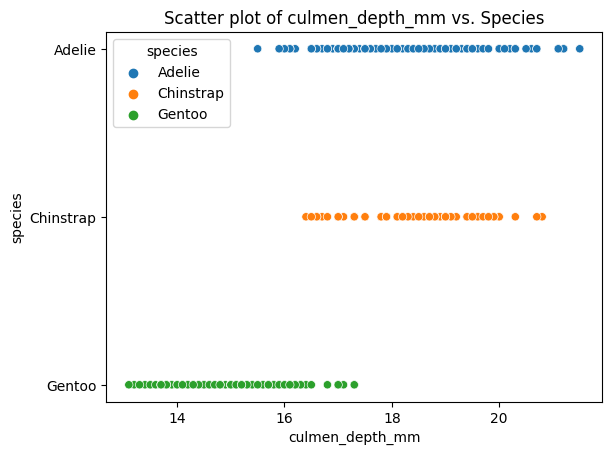

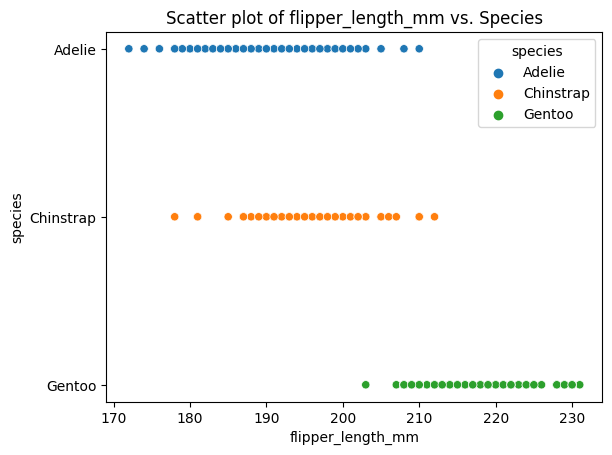

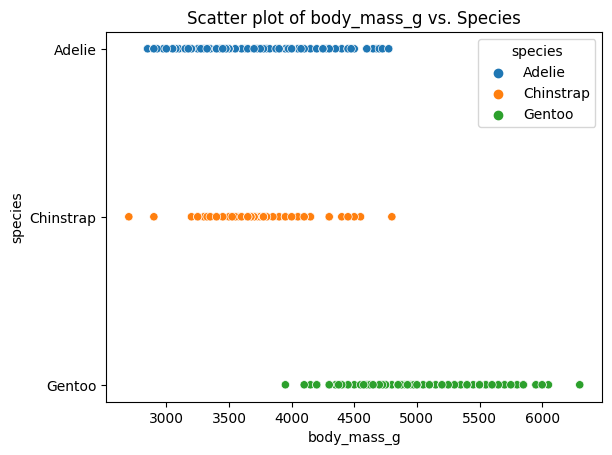

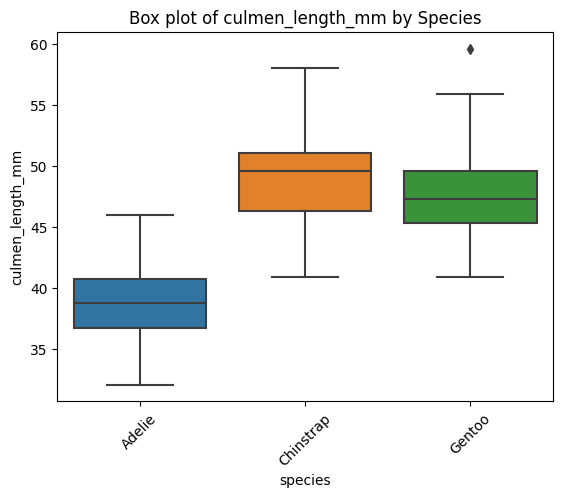

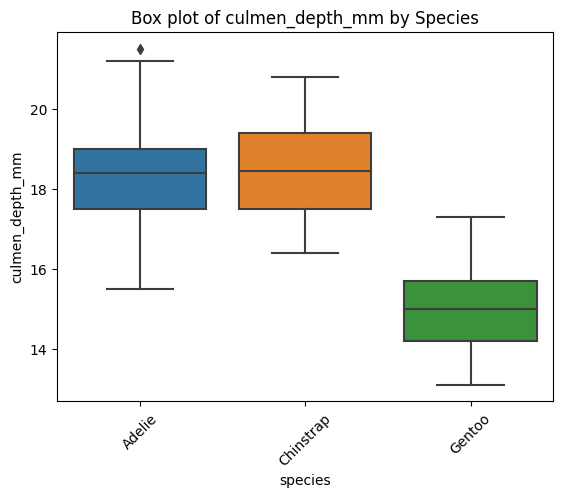

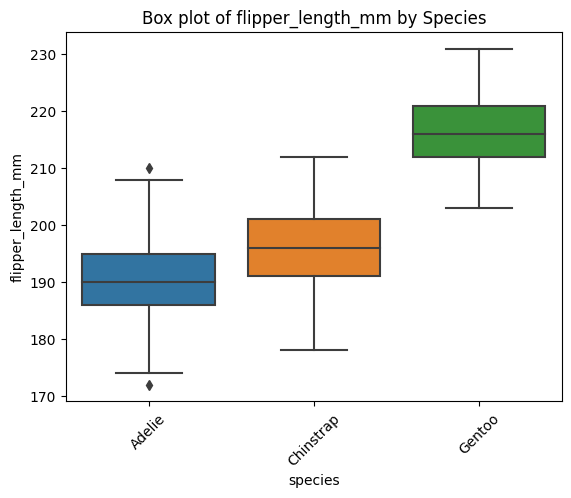

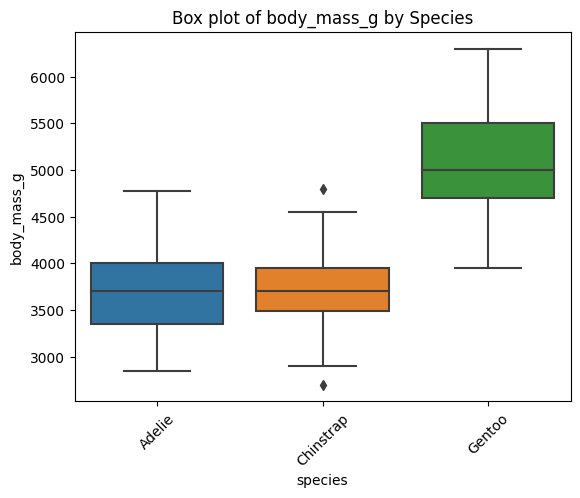

In [4]:
def bivariate_analysis(data):
    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    
    for feature in numerical_features:
        sns.scatterplot(data=data, x=feature, y='species', hue='species')
        plt.title(f'Scatter plot of {feature} vs. Species')
        plt.show()

    for feature in numerical_features:
        sns.boxplot(data=data, x='species', y=feature)
        plt.title(f'Box plot of {feature} by Species')
        plt.xticks(rotation=45)
        plt.show()

bivariate_analysis(data)

# Multi-Variate Analysis

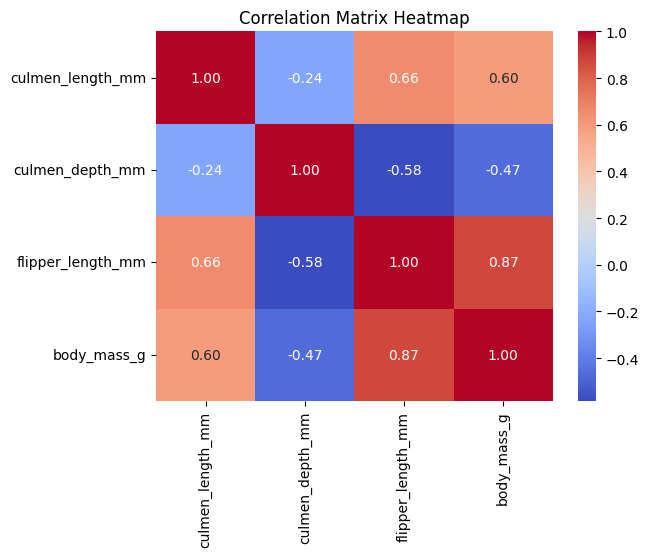

In [5]:
def multi_variate_analysis(data):

    numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
    correlation_matrix = data[numerical_features].corr()
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

multi_variate_analysis(data)

# 4. Perform descriptive statistics on the dataset


In [6]:
print(data.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


# 5. Check for Missing values and deal with them

In [7]:
data.dropna(inplace=True)

# 6. Find the outliers and replace them

In [8]:
def handle_outliers(data, columns, threshold=3):
    z_scores = np.abs(stats.zscore(data[columns]))
    outlier_indices = np.where(z_scores > threshold)
    
    for column in columns:
        mean_value = data[column].mean()
        for index in outlier_indices[0]:
            data.at[index, column] = mean_value


numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

handle_outliers(data, numerical_columns)



# 7. Check the correlation of independent variables with the target


In [11]:
data_encoded = pd.get_dummies(data, columns=['species', 'island', 'sex'], drop_first=True)
correlation_matrix = data_encoded.corr()
species_correlations = correlation_matrix.filter(like='species_', axis=0)
print(species_correlations)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species_Chinstrap          0.448779         0.324241          -0.187472   
species_Gentoo             0.487312        -0.822388           0.867414   

                   body_mass_g  species_Chinstrap  species_Gentoo  \
species_Chinstrap    -0.299458           1.000000       -0.378615   
species_Gentoo        0.821454          -0.378615        1.000000   

                   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
species_Chinstrap      0.662220         -0.204608    0.006056 -0.003028  
species_Gentoo        -0.571735         -0.303034   -0.015994  0.007997  


# 8. Check for Categorical columns and perform encoding



In [12]:
data_encoded = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

# 9. Split the data into dependent and independent variables



In [13]:
X = data_encoded.drop('species', axis=1)
y = data_encoded['species']

# 10. Scaling the data


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. Split the data into training and testing


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 12. Check the training and testing data shape


X_train shape: (267, 8)
X_test shape: (67, 8)
y_train shape: (267,)
y_test shape: (67,)
Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



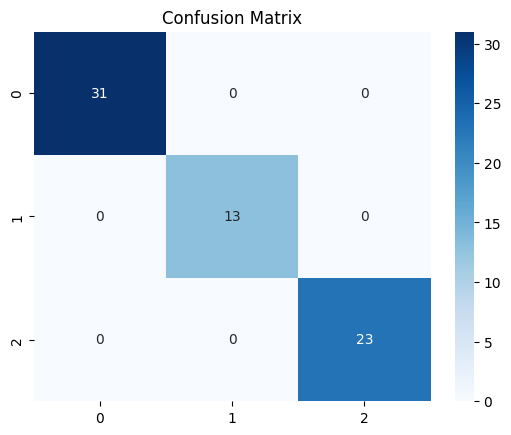

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()